In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('data_kmean.csv')
df

,brand.id,gender,hasSimilarProducts,id,isCustomizable,merchandiseLabel,merchandiseLabelField,merchantId,priceInfo.finalPrice,priceInfo.isOnSale
0,8360,women,True,13415450,False,NaN,NoTag,9359,1080,False
1,2049368,women,True,13784566,False,NaN,NoTag,9319,392,True
2,15514,women,True,13377441,False,NaN,NoTag,9140,1245,False
3,49486,women,False,13744082,False,NaN,NoTag,9031,308,True
4,34624,women,True,13668256,False,NaN,NoTag,9339,1248,False
...,...,...,...,...,...,...,...,...,...,...
188812,59394,unisex,False,10047577,False,Permanent Collection,NoTag,9089,207,False
188813,59394,unisex,False,10047571,False,NaN,NoTag,9089,207,False
188814,59394,unisex,False,10047569,False,NaN,NoTag,9089,207,False
188815,59394,unisex,False,10047567,False,NaN,NoTag,9089,207,False


In [3]:
print(df.isna().sum())
df.info()

brand.id                      0
gender                        0
hasSimilarProducts            0
id                            0
isCustomizable                0
merchandiseLabel         132376
merchandiseLabelField         0
merchantId                    0
priceInfo.finalPrice          0
priceInfo.isOnSale            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188817 entries, 0 to 188816
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   brand.id               188817 non-null  int64 
 1   gender                 188817 non-null  object
 2   hasSimilarProducts     188817 non-null  bool  
 3   id                     188817 non-null  int64 
 4   isCustomizable         188817 non-null  bool  
 5   merchandiseLabel       56441 non-null   object
 6   merchandiseLabelField  188817 non-null  object
 7   merchantId             188817 non-null  int64 
 8   priceInfo.finalPrice   188817 n

In [4]:
# drop id column as it is probably not useful
# the rest of non-int columns are label encoded

df = df.drop(['id'], axis=1)

labelEncoder = LabelEncoder()

labelEncoder.fit(df['gender'])
df['gender'] = labelEncoder.transform(df['gender'])

labelEncoder.fit(df['hasSimilarProducts'])
df['hasSimilarProducts'] = labelEncoder.transform(df['hasSimilarProducts'])

labelEncoder.fit(df['isCustomizable'])
df['isCustomizable'] = labelEncoder.transform(df['isCustomizable'])

labelEncoder.fit(df['merchandiseLabelField'])
df['merchandiseLabelField'] = labelEncoder.transform(df['merchandiseLabelField'])

labelEncoder.fit(df['priceInfo.isOnSale'])
df['priceInfo.isOnSale'] = labelEncoder.transform(df['priceInfo.isOnSale'])

df.fillna('NaN', inplace=True)
labelEncoder.fit(df['merchandiseLabel'])
df['merchandiseLabel'] = labelEncoder.transform(df['merchandiseLabel'])

df

,brand.id,gender,hasSimilarProducts,isCustomizable,merchandiseLabel,merchandiseLabelField,merchantId,priceInfo.finalPrice,priceInfo.isOnSale
0,8360,1,1,0,1,2,9359,1080,0
1,2049368,1,1,0,1,2,9319,392,1
2,15514,1,1,0,1,2,9140,1245,0
3,49486,1,0,0,1,2,9031,308,1
4,34624,1,1,0,1,2,9339,1248,0
...,...,...,...,...,...,...,...,...,...
188812,59394,0,0,0,3,2,9089,207,0
188813,59394,0,0,0,1,2,9089,207,0
188814,59394,0,0,0,1,2,9089,207,0
188815,59394,0,0,0,1,2,9089,207,0


In [5]:
# categorical features(more than 2 catergories) are one hot encoded using pandas dummies

categorical_features = ['merchandiseLabel', 'merchandiseLabelField']

for col in categorical_features:
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)
df.head()

,brand.id,gender,hasSimilarProducts,isCustomizable,merchantId,priceInfo.finalPrice,priceInfo.isOnSale,merchandiseLabel_0,merchandiseLabel_1,merchandiseLabel_2,merchandiseLabel_3,merchandiseLabel_4,merchandiseLabel_5,merchandiseLabelField_0,merchandiseLabelField_1,merchandiseLabelField_2
0,8360,1,1,0,9359,1080,0,0,1,0,0,0,0,0,0,1
1,2049368,1,1,0,9319,392,1,0,1,0,0,0,0,0,0,1
2,15514,1,1,0,9140,1245,0,0,1,0,0,0,0,0,0,1
3,49486,1,0,0,9031,308,1,0,1,0,0,0,0,0,0,1
4,34624,1,1,0,9339,1248,0,0,1,0,0,0,0,0,0,1


In [6]:
scaler = MinMaxScaler()
scaler.fit(df)
df_transformed = scaler.transform(df)

# Use euclidean distance for the elbow method of choosing k

Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

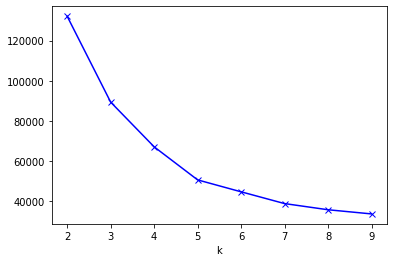

In [7]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.show()

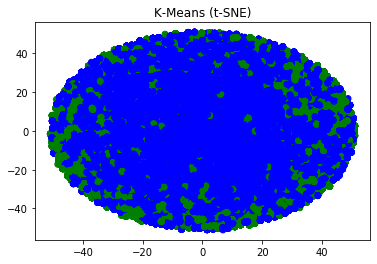

In [8]:
kmeans_clustering = KMeans(n_clusters = 2)
idx = kmeans_clustering.fit_predict(df)

#use t-sne
X = TSNE(n_components=2, perplexity=10).fit_transform(df)

#plot graph
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
plt.scatter(X[:,0], X[:,1], c=colors[kmeans_clustering.labels_])
plt.title('K-Means (t-SNE)')
plt.show()